In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pothole-dataset/README.dataset.txt
/kaggle/input/pothole-dataset/README.roboflow.txt
/kaggle/input/pothole-dataset/data.yaml
/kaggle/input/pothole-dataset/valid/labels/0368_jpg.rf.4efa7f3567dabed5dc8310ad0129a3e6.txt
/kaggle/input/pothole-dataset/valid/labels/0582_jpg.rf.776e21905a392fba4059021e2988d33a.txt
/kaggle/input/pothole-dataset/valid/labels/148_jpg.rf.03ec9fdc7f0706b8b1f8a779cebd508d.txt
/kaggle/input/pothole-dataset/valid/labels/img-505_jpg.rf.419771c06ce2741a8ed3391eb3f62394.txt
/kaggle/input/pothole-dataset/valid/labels/221_jpg.rf.c3465a3b33808cc0ae0cab3e725f0453.txt
/kaggle/input/pothole-dataset/valid/labels/175_jpg.rf.39d167b9a458901aaddab17337446ab2.txt
/kaggle/input/pothole-dataset/valid/labels/42_jpg.rf.fb924a547dfb522c2236d27026cc424a.txt
/kaggle/input/pothole-dataset/valid/labels/73_jpg.rf.42232d020fadfd68e94408c69bb87660.txt
/kaggle/input/pothole-dataset/valid/labels/213_jpg.rf.ab68db4d181956a1f899e6dd6a702eeb.txt
/kaggle/input/pothole-dataset/valid/la

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import seaborn as sns
import tensorflow as tf
from PIL import Image

In [4]:
img = Image.open("/kaggle/input/pothole-dataset/train/images/-GRMN4217-351_jpeg_jpg.rf.32c62bbf2aca36bb59d36d0e361bf331.jpg")
img.size

(640, 640)

In [18]:
def split_data():

    Train = "/kaggle/input/pothole-dataset/train"
    Test = "/kaggle/input/pothole-dataset/test"
    Val = "/kaggle/input/pothole-dataset/valid"

    train = tf.keras.preprocessing.image_dataset_from_directory(
        Train,
        shuffle=True,
        image_size=(224,224),
        seed = 42,
        subset="training",
        validation_split=0.2,
        batch_size=32,
    )

    test = tf.keras.preprocessing.image_dataset_from_directory(
        Test,
        shuffle=True,
        image_size=(224,224),
        batch_size=32,
    )

    validation = tf.keras.preprocessing.image_dataset_from_directory(
        Val,
        shuffle=True,
        image_size=(224,224),
        seed = 42,
        subset="validation",
        validation_split=0.2,
        batch_size=32,
    )

    return train,test,validation

# Data Split 

In [26]:
train,test,validation = split_data()
print(train,test,validation)

Found 11068 files belonging to 2 classes.
Using 8855 files for training.
Found 891 files belonging to 2 classes.
Found 1808 files belonging to 2 classes.
Using 361 files for validation.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# Visuals

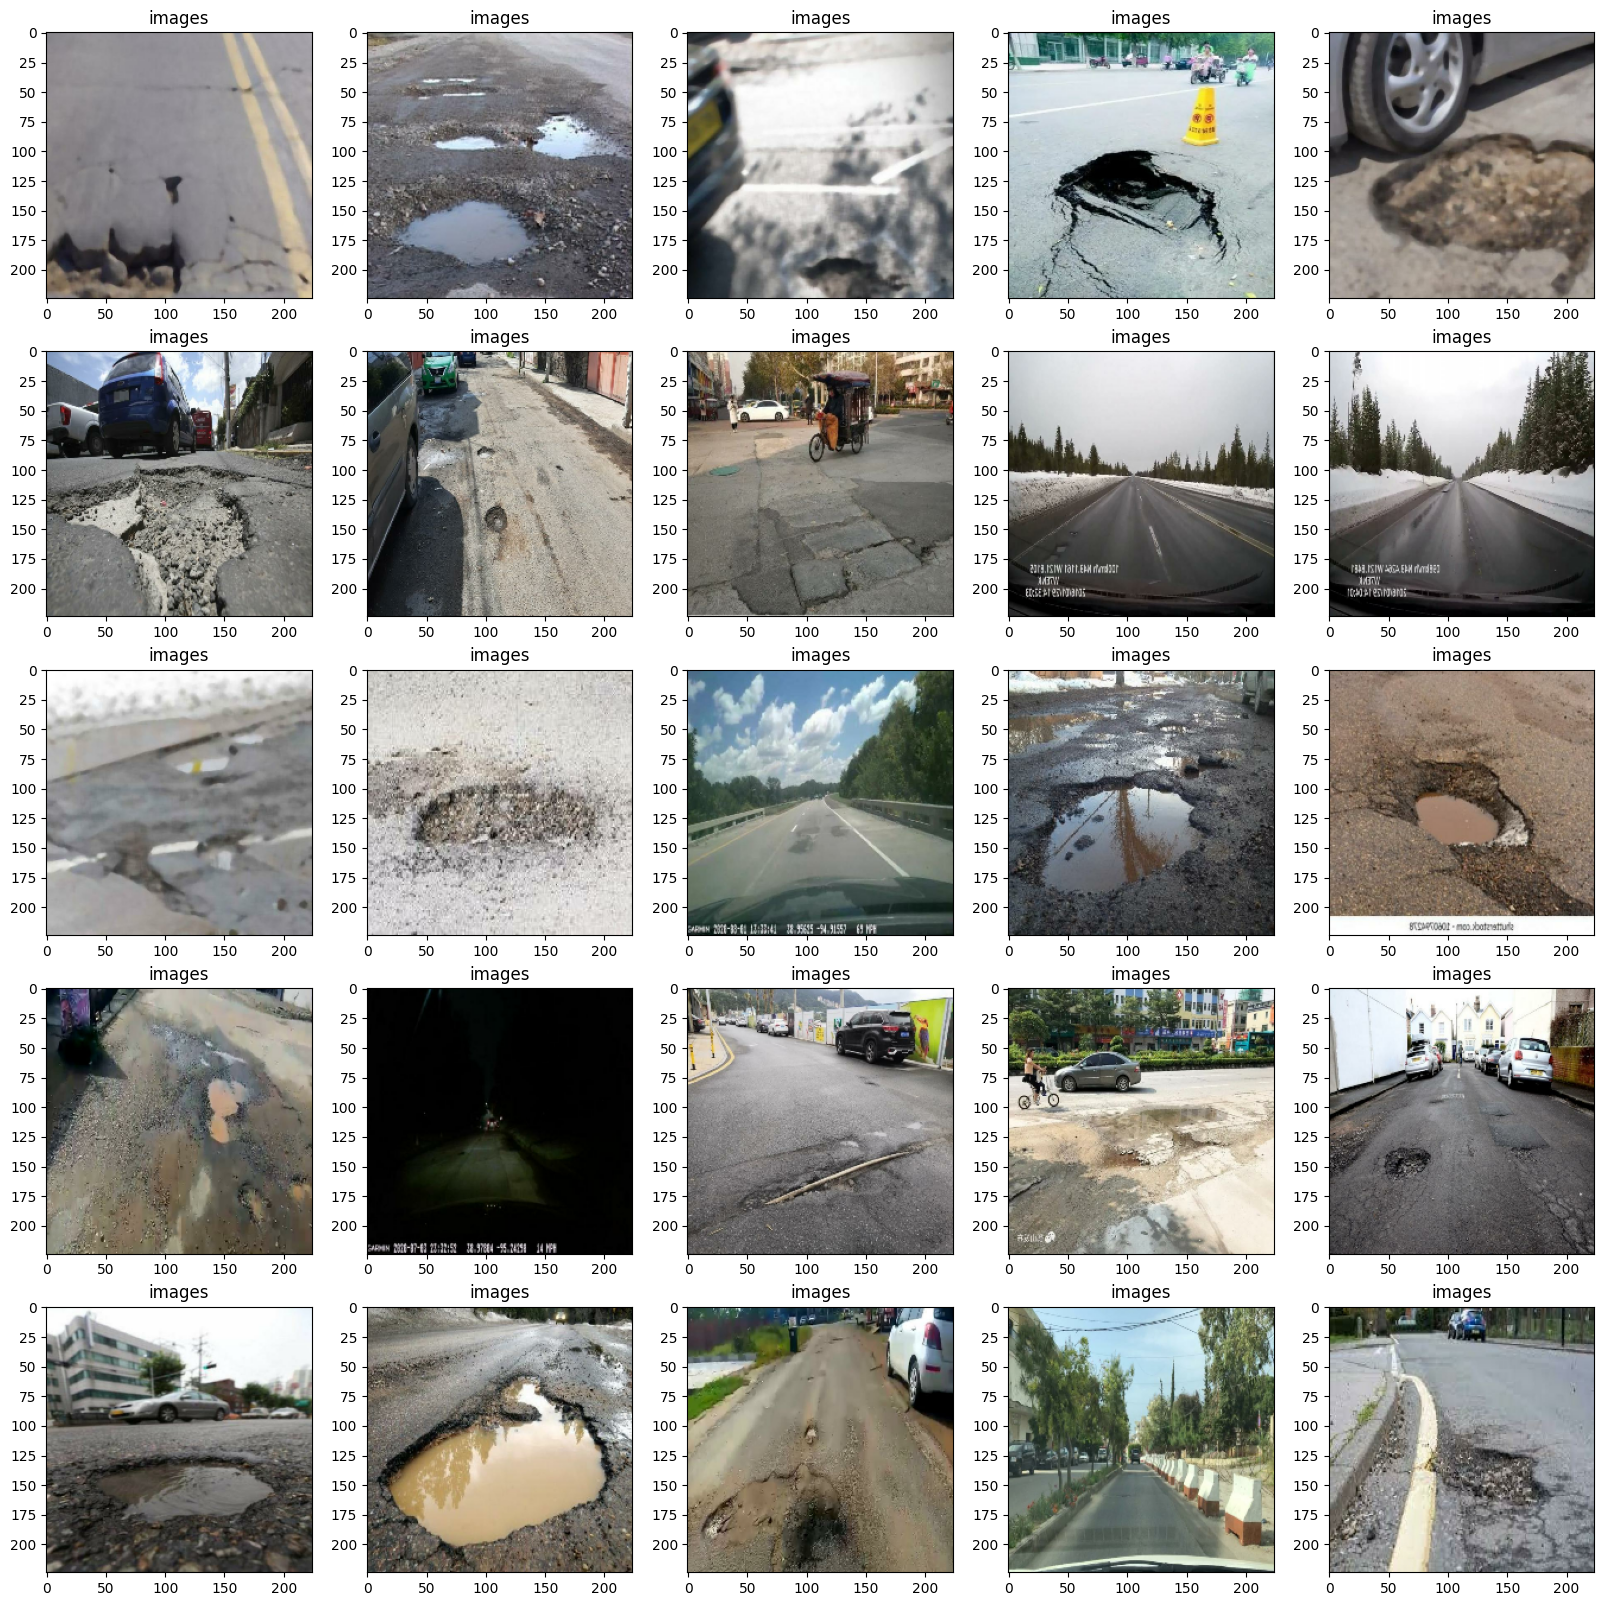

In [7]:
class_name = train.class_names
for images, labels in train.take(1):
  plt.figure(figsize = (20,20))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = labels[i]
    plt.title(f"{class_name[label_index]}")
  plt.show()

# CNN Network

In [34]:
def network():

    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255,input_shape=(224,224,3)),
        Conv2D(64,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(32,(3,3),activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(512,activation="relu"),
        Dropout(0.3),
        Dense(128,activation="relu"),
        Dropout(0.4),
        Dense(1,activation="sigmoid")
    ])

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

    return model

In [35]:
model = network()
model.fit(train,epochs=10,batch_size=16,validation_data=(test))

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.9895 - loss: 0.0157 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      47,776,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143,586,917 (547.74 MB)

 Trainable params: 47,862,305 (182.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 95,724,612 (365.16 MB)

# Model Evaluation

In [22]:
loss,acc = model.evaluate(validation)
loss,acc

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 1.0000 - loss: 0.0000e+00


(0.0, 1.0)

In [36]:
model.save("pothole_detection.h5")

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load a pre-trained model (replace this with a custom-trained model if needed)
model = tf.keras.models.load_model('/kaggle/working/pothole_detection.h5')  # Update the path

# Load and preprocess test image
img_path = '/kaggle/input/pothole-dataset/test/images/0081_jpg.rf.d1735a9bb243cb526d9e3e094531c94b.jpg'  # Update with your test image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image (instead of preprocess_input)

# Make a prediction
predictions = model.predict(img_array)
predicted_label = "Pothole" if predictions[0][0] > 0.5 else "No Pothole"

# Display the image and prediction
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()


NameError: name 'preprocess_input' is not defined